In [3]:
import glob
import msgpack
import pandas as pd
import numpy as np
import numba as nb
import itertools
from collections import defaultdict
pd.set_option('display.max_columns', None) # show all columns

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

# packing

In [1]:
# import time
# import datetime
# import msgpack
# # record starting time as file name
# start_time = time.time()
# timestr = datetime.datetime.fromtimestamp(
#     start_time).strftime("%Y%m%d-%H%M%S.%f")
# # example format: '20190915-034034.694503'

# n_data = list(range(13))
# n_data[0] = datetime.datetime.now().timestamp()
# # create a file
# file_name = "TMP\{}.mp".format(timestr)
# file = open(file_name, "wb+")
# packer = msgpack.Packer(use_bin_type=True)

# for k in range(1000):
#     file.write(packer.pack(n_data))
# file.close()

In [2]:
import datetime
import time
print(datetime.datetime.now().timestamp())
print(time.time())

1606751636.666943
1606751636.667971


# Unpacking

In [4]:
data_folder = "..\\data\\"

file_name_list = glob.glob(f"{data_folder}*.mp")
print(file_name_list)
file_name = file_name_list[-1]

with open(file_name, "rb+") as file:
    unpacker = msgpack.Unpacker(file, raw=False,use_list=False)
    columns = unpacker.unpack()
    print(columns)
    data = [o for o in unpacker]
    data = data[:-1] # drop last row

def GetLen(d):
    """
    get length of any object
    """
    try: 
        return len(d)
    except TypeError:
        return 1
# benchmarking https://medium.com/@shmulikamar/python-serialization-benchmarks-8e5bb700530b

for c,d in zip(columns,data[0]):
    print(c,GetLen(d))

['..\\data\\20201125-054510.229297.mp', '..\\data\\20201125-063811.063451.mp', '..\\data\\20201125-064909.165522.mp', '..\\data\\20201125-074639.498363.mp', '..\\data\\20201125-181317.440705.mp', '..\\data\\20201126-071419.539088.mp', '..\\data\\20201127-070740.398316.mp', '..\\data\\20201128-110936.952543.mp']
('t', 'joint_pos', 'joint_vel', 'actuation', 'orientation', 'ang_vel', 'com_acc', 'com_vel', 'com_pos', 'cmd')
t 1
joint_pos 4
joint_vel 4
actuation 4
orientation 6
ang_vel 3
com_acc 3
com_vel 3
com_pos 3
cmd 4


In [5]:
ID =defaultdict(None,{name: k  for k,name in enumerate(columns)})
print(ID)

defaultdict(None, {'t': 0, 'joint_pos': 1, 'joint_vel': 2, 'actuation': 3, 'orientation': 4, 'ang_vel': 5, 'com_acc': 6, 'com_vel': 7, 'com_pos': 8, 'cmd': 9})


In [9]:
df = pd.DataFrame(data,columns=columns)#,dtype=float)
df

,t,joint_pos,joint_vel,actuation,orientation,ang_vel,com_acc,com_vel,com_pos,cmd
0,47.156000,"(-1.4635929002018306, 1.0760263342639462, 2.02...","(3.9712804819672654, -1.6931464155515163, -13....","(-0.002747773465584749, -0.010211818301331334,...","(-0.5694621351634115, 0.7927207517049926, 0.21...","(4.322196791898142, -3.9444840763343048, 1.032...","(-2.5545192422636678, 6.49347159984807, 7.9682...","(0.6177291370193516, -0.32103097933910973, 0.3...","(0.7049737916917161, -1.1560408785502938, 0.10...","(3.5067431109945773, -1.6272903113909578, -16...."
1,47.162000,"(-1.432461009405281, 1.0627019413257834, 1.928...","(4.3754922693992615, -1.4342869961028182, -15....","(-0.025880927384635904, -0.005883401050958923,...","(-0.5701355616381798, 0.797739752755171, 0.196...","(3.6569596724160194, -3.594869403832259, 0.454...","(-13.056103268247835, -4.563097255969345, 16.1...","(0.5393925174098646, -0.3484095628749258, 0.49...","(0.7082101467961753, -1.1581313359275434, 0.10...","(3.5067431109945773, -1.6272903113909578, -16...."
2,47.168000,"(-1.4129661071097726, 1.0570067793185405, 1.83...","(4.043032111864298, -1.3802883128705146, -17.5...","(-0.019754371503239235, -0.014169465647475144,...","(-0.5724522413275963, 0.8005727481058326, 0.17...","(3.164787501029018, -3.2583109751437442, 0.081...","(-12.667005620504222, -4.014196234704134, 0.80...","(0.46339048368683927, -0.3724947402831506, 0.5...","(0.7109904896982964, -1.1603663043692423, 0.11...","(3.5067431109945773, -1.6272903113909578, -16...."
3,47.174000,"(-1.3957554451703027, 1.0546945632714038, 1.74...","(2.820146718043759, -0.019902423558759708, -15...","(-0.0007623032268431101, -0.04139155999152867,...","(-0.5750908003841022, 0.8070998438486549, 0.13...","(5.830180369264292, -7.308498646076808, 0.7441...","(2.353488741804438, -11.936327754492725, -3.14...","(0.4775114161376659, -0.44411270681010695, 0.4...","(0.7138555581951224, -1.163030980610103, 0.114...","(3.5067431109945773, -1.6272903113909578, -16...."
4,47.180000,"(-1.3678476189149762, 1.0501401964123314, 1.63...","(4.727014019752174, -0.7081582843667666, -16.8...","(-0.032087250614581814, -0.04476837404769785, ...","(-0.5817338342518247, 0.8080847557981815, 0.09...","(7.580482439966899, -6.923125010526921, -0.084...","(6.299878398844142, -8.281834997613128, -7.129...","(0.5153106865307308, -0.4938037167957857, 0.43...","(0.7169474223143067, -1.1659938029108776, 0.11...","(3.5067431109945773, -1.6272903113909578, -16...."
...,...,...,...,...,...,...,...,...,...,...
14392133,86399.977941,"(-0.6262170123114634, -1.4807954417044773, -0....","(4.948923598593558, 13.252104449627765, -8.568...","(0.007456975438917017, 0.17419123694746994, -0...","(0.545961947015989, 0.8374600162213075, -0.024...","(-5.588959906268901, 7.053399935753946, -2.803...","(-0.6667372180283829, 2.789752939078326, 1.504...","(0.049206287079828215, 0.17496012709491046, 0....","(-3.4359836579401852, -51.96464746018069, 0.03...","(2.0645003188804445, 13.06962071230533, -10.13..."
14392134,86399.983941,"(-0.5995324264820568, -1.3927969370909807, -0....","(4.073691186668282, 15.825159870661798, -10.51...","(-0.011491544532621602, 0.1313224250042289, -0...","(0.5421077519907366, 0.8396288762933032, -0.03...","(2.3689487933531366, 1.5022663439210477, 0.916...","(19.798596211101977, -2.763361200703372, -22.5...","(0.16799786434644007, 0.15837995989069023, 0.0...","(-3.4349756707541066, -51.96369718042135, 0.03...","(2.0645003188804445, 13.06962071230533, -10.13..."
14392135,86399.989941,"(-0.5753721329468842, -1.3144455349240425, -0....","(3.532351137015277, 14.038303892246583, -9.193...","(-0.028807458541902663, 0.14851230859149495, -...","(0.5300299930935737, 0.8474520945002877, -0.02...","(8.218441552864906, -0.8533156505420232, 2.334...","(-12.360037102390443, -17.820000983172054, -9....","(0.09383764173209741, 0.05145995399165789, -0....","(-3.434412644903714, -51.9633884206974, 0.0343...","(2.0645003188804445, 13.06962071230533, -10.13..."
14392

In [10]:
freq_control_measured = (len(df.index)-1)/(df['t'].iloc[-1] - df['t'].iloc[0])
freq_control_ideal = 5/3*100
percent_packet_lost = (1- freq_control_measured/freq_control_ideal)*100
print(f"Control loop frequency:{freq_control_measured:.2f} Hz, {percent_packet_lost:.2f}% packet lost")

Control loop frequency:166.67 Hz, 0.00% packet lost


In [11]:
def FlatViewConverter(data, columns):
    """
    create a flat view of the data, **assuming the the first column is a scalar (time t)**
    Input:
        data: a list of list generated by the msgpack unpacker
        columns: the names of the unflattened columns
    Output:
        data_flat: a flat view of the data (numpy)
        columns_flat: a flat view of the columns
        columns_index: the start and end index of respective element in columns
        columns_len: the lenth of the respective element in columns, i.e. the vector length
                     of the represented list in the respective column
    """
    columns_len = np.array([GetLen(d) for d in data[0]])
    n_rows = len(data)
    n_cols = sum(columns_len)
    columns_index = np.zeros(len(columns_len)+1, dtype=int)
    columns_index[1:] = np.cumsum(columns_len)

    data_flat = np.empty((n_rows, n_cols), dtype=np.float64)
    # convert columns[1:] to flatten view, equivalent to:
    # np.asarray([[item for sublist in row[1:] for item in sublist] for row in data],dtype=np.float64)
    it = itertools.chain.from_iterable(
        (itertools.chain(*row[1:]) for row in data))
    data_flat[:, 1:] = np.fromiter(it, dtype=np.float64).reshape(
        (-1, n_cols-1))  # rest columns
    data_flat[:, 0] = np.fromiter(
        (row[0] for row in data), dtype=np.float64)  # fist column
    
    columns_flat = list(itertools.chain.from_iterable(itertools.chain(
        (f"{c}_{k}" if cl > 1 else c for k in range(cl))) for c, cl in zip(columns, columns_len)))
    return data_flat, columns_flat, columns_index, columns_len

data_flat, columns_flat, columns_index, columns_len = FlatViewConverter(data,columns)
# print(columns_flat)

In [12]:
print(dict(enumerate(columns_flat)))

{0: 't', 1: 'joint_pos_0', 2: 'joint_pos_1', 3: 'joint_pos_2', 4: 'joint_pos_3', 5: 'joint_vel_0', 6: 'joint_vel_1', 7: 'joint_vel_2', 8: 'joint_vel_3', 9: 'actuation_0', 10: 'actuation_1', 11: 'actuation_2', 12: 'actuation_3', 13: 'orientation_0', 14: 'orientation_1', 15: 'orientation_2', 16: 'orientation_3', 17: 'orientation_4', 18: 'orientation_5', 19: 'ang_vel_0', 20: 'ang_vel_1', 21: 'ang_vel_2', 22: 'com_acc_0', 23: 'com_acc_1', 24: 'com_acc_2', 25: 'com_vel_0', 26: 'com_vel_1', 27: 'com_vel_2', 28: 'com_pos_0', 29: 'com_pos_1', 30: 'com_pos_2', 31: 'cmd_0', 32: 'cmd_1', 33: 'cmd_2', 34: 'cmd_3'}


In [13]:
# ################ store data to pickle ##################
# import pickle
# pickle_data = {
#     "data_flat": data_flat,
#     "columns_flat": columns_flat,
#     "columns_index": columns_index,
#     "columns_len": columns_len,
# }
# pickle.dump(pickle_data, open("..\\data\\pickle_data.p", "wb"))
# ######################################################

# load pickled data

In [14]:
################ load pickled data ##################
import pickle
pickle_data = pickle.load(open("..\\data\\pickle_data.p", "rb"))
data_flat = pickle_data["data_flat"]
columns_flat = pickle_data["columns_flat"]
columns_index = pickle_data["columns_index"]
columns_len = pickle_data["columns_len"]

In [9]:
# # preprocess:
# # estimate com_acc from com_pos
# com_acc = data_flat[:,columns_index[ID["com_acc"]]:columns_index[ID["com_acc"]+1]]
# com_vel = data_flat[:,columns_index[ID["com_vel"]]:columns_index[ID["com_vel"]+1]]
# t = data_flat[:,columns_index[ID["t"]]]
# dt = (t[1:]-t[:-1])
# com_acc_bw = (com_vel[1:]-com_vel[:-1])/dt[:, None]
# data_flat[:-1,columns_index[ID["com_acc"]]:columns_index[ID["com_acc"]+1]] = com_acc_bw
# data_flat = data_flat[:-1][np.all(com_acc_bw<100,axis=1)]

In [16]:
df = pd.DataFrame(data_flat,columns=columns_flat)
df

,t,joint_pos_0,joint_pos_1,joint_pos_2,joint_pos_3,joint_vel_0,joint_vel_1,joint_vel_2,joint_vel_3,actuation_0,actuation_1,actuation_2,actuation_3,orientation_0,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,ang_vel_0,ang_vel_1,ang_vel_2,com_acc_0,com_acc_1,com_acc_2,com_vel_0,com_vel_1,com_vel_2,com_pos_0,com_pos_1,com_pos_2,cmd_0,cmd_1,cmd_2,cmd_3
0,47.156000,-1.463593,1.076026,2.028698,0.746492,3.971280,-1.693146,-13.401879,-5.584139,-0.002748,-0.010212,-0.430749,-0.096295,-0.569462,0.792721,0.217501,0.811502,0.584328,-0.005009,4.322197,-3.944484,1.032174,-2.554519,6.493472,7.968277,0.617729,-0.321031,0.398682,0.704974,-1.156041,0.105977,3.506743,-1.627290,-16.739207,-8.175610
1,47.162000,-1.432461,1.062702,1.928392,0.705889,4.375492,-1.434287,-15.271665,-6.887937,-0.025881,-0.005883,-0.413141,-0.099984,-0.570136,0.797740,0.196359,0.810121,0.585639,-0.027036,3.656960,-3.594869,0.454866,-13.056103,-4.563097,16.115387,0.539393,-0.348410,0.495374,0.708210,-1.158131,0.108949,3.506743,-1.627290,-16.739207,-8.175610
2,47.168000,-1.412966,1.057007,1.833662,0.671368,4.043032,-1.380288,-17.510808,-6.239186,-0.019754,-0.014169,-0.402655,-0.133934,-0.572452,0.800573,0.177149,0.807766,0.587724,-0.045769,3.164788,-3.258311,0.081225,-12.667006,-4.014196,0.804188,0.463390,-0.372495,0.500199,0.710990,-1.160366,0.111951,3.506743,-1.627290,-16.739207,-8.175610
3,47.174000,-1.395755,1.054695,1.740012,0.629765,2.820147,-0.019902,-15.973312,-7.055168,-0.000762,-0.041392,-0.430295,-0.140371,-0.575091,0.807100,0.133643,0.805350,0.587247,-0.080943,5.830180,-7.308499,0.744188,2.353489,-11.936328,-3.149831,0.477511,-0.444113,0.481300,0.713856,-1.163031,0.114838,3.506743,-1.627290,-16.739207,-8.175610
4,47.180000,-1.367848,1.050140,1.638659,0.582412,4.727014,-0.708158,-16.862443,-8.821010,-0.032087,-0.044768,-0.420053,-0.126758,-0.581734,0.808085,0.092654,0.798229,0.589066,-0.125823,7.580482,-6.923125,-0.084968,6.299878,-8.281835,-7.129466,0.515311,-0.493804,0.438523,0.716947,-1.165994,0.117470,3.506743,-1.627290,-16.739207,-8.175610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14392133,86399.977941,-0.626217,-1.480795,-0.587773,-3.031250,4.948924,13.252104,-8.568769,0.327338,0.007457,0.174191,-0.231269,0.088153,0.545962,0.837460,-0.024213,-0.832926,0.539436,-0.123462,-5.588960,7.053400,-2.803459,-0.666737,2.789753,1.504343,0.049206,0.174960,0.177973,-3.435984,-51.964647,0.034195,2.064500,13.069621,-10.131477,3.028216
14392134,86399.983941,-0.599532,-1.392797,-0.644402,-3.027809,4.073691,15.825160,-10.513677,1.414607,-0.011492,0.131322,-0.220641,0.105900,0.542108,0.839629,-0.033801,-0.837083,0.536068,-0.109191,2.368949,1.502266,0.916707,19.798596,-2.763361,-22.503084,0.167998,0.158380,0.042955,-3.434976,-51.963697,0.034452,2.064500,13.069621,-10.131477,3.028216
14392135,86399.989941,-0.575372,-1.314446,-0.695227,-3.010620,3.532351,14.038304,-9.193206,3.615044,-0.028807,0.148512,-0.252282,0.086760,0.530030,0.847452,-0.029886,-0.847266,0.527810,-0.059640,8.218442,-0.853316,2.334784,-12.360037,-17.820001,-9.894966,0.093838,0.051460,-0.016415,-3.434413,-51.963388,0.034354,2.064500,13.069621,-10.131477,3.028216
14392136,86399.995941,-0.558118,-1.232336,-0.749194,-2.978895,3.148456,12.238776,-7.994110,5.863595,-0.034438,0.158645,-0.276759,0.039398,0.533474,0.844265,-0.051207,-0.845730,0.531575,-0.046577,2.205638,3.592374,-0.578580,12.154379,2.959865,11.878467,0.166764,0.069219,0.054856,-3.433412,-51.962973,0.034683,2.064500,13.069621,-10.131477,3.028216


In [17]:
df.describe() # this will take a few minutes

,t,joint_pos_0,joint_pos_1,joint_pos_2,joint_pos_3,joint_vel_0,joint_vel_1,joint_vel_2,joint_vel_3,actuation_0,actuation_1,actuation_2,actuation_3,orientation_0,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,ang_vel_0,ang_vel_1,ang_vel_2,com_acc_0,com_acc_1,com_acc_2,com_vel_0,com_vel_1,com_vel_2,com_pos_0,com_pos_1,com_pos_2,cmd_0,cmd_1,cmd_2,cmd_3
count,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07,1.439214e+07
mean,4.322358e+04,-2.786503e-04,2.091521e-03,-1.655684e-03,2.943457e-03,-3.261076e-02,2.307671e-03,-1.425508e-02,5.970284e-03,-6.237824e-04,-7.086302e-05,-3.715154e-04,-1.054593e-04,-1.259087e-03,3.491585e-03,1.468476e-03,-2.390599e-03,3.543051e-03,7.293542e-04,2.568350e-04,1.951552e-03,-8.818141e-04,-5.565123e-06,5.027673e-06,-3.127780e-06,-4.794780e-05,-5.883377e-04,-7.994518e-07,-8.496294e+00,8.115521e+00,9.533618e-02,-3.265791e-02,2.343671e-03,-1.439390e-02,5.794160e-03
std,2.492792e+04,1.819718e+00,1.812548e+00,1.811678e+00,1.817426e+00,1.165433e+01,1.168828e+01,1.168355e+01,1.166726e+01,1.927903e-01,1.951146e-01,1.954939e-01,1.971416e-01,6.742403e-01,6.717896e-01,3.067293e-01,6.722278e-01,6.745596e-01,3.050582e-01,5.282471e+00,3.564434e+00,2.212333e+00,1.292389e+01,1.292730e+01,2.400933e+01,2.991874e-01,2.981806e-01,4.728575e-01,1.416450e+01,2.964360e+01,5.173230e-02,1.154981e+01,1.153597e+01,1.155738e+01,1.156220e+01
min,4.715600e+01,-3.141593e+00,-3.141593e+00,-3.141593e+00,-3.141592e+00,-4.380644e+01,-4.841468e+01,-4.830697e+01,-4.427171e+01,-7.957888e-01,-8.409936e-01,-8.294188e-01,-8.411142e-01,-1.000000e+00,-1.000000e+00,-9.999997e-01,-1.000000e+00,-1.000000e+00,-9.999963e-01,-7.058050e+01,-1.744743e+02,-6.369831e+01,-4.203443e+02,-5.272065e+02,-3.172271e+02,-2.347280e+00,-2.152548e+00,-2.849284e+00,-4.473911e+01,-5.658603e+01,1.899845e-02,-1.999991e+01,-1.999990e+01,-1.999957e+01,-1.999995e+01
25%,2.163536e+04,-1.579753e+00,-1.562287e+00,-1.562640e+00,-1.571512e+00,-9.833202e+00,-9.711674e+00,-9.781846e+00,-9.796623e+00,-1.376010e-01,-1.366219e-01,-1.377890e-01,-1.382837e-01,-6.598480e-01,-6.500457e-01,-1.523600e-01,-6.602232e-01,-6.582727e-01,-1.821536e-01,-3.102243e+00,-2.032983e+00,-1.251545e+00,-5.693699e+00,-5.688088e+00,-1.239367e+01,-1.613433e-01,-1.609873e-01,-3.004031e-01,-1.908677e+01,-6.484090e+00,5.831309e-02,-1.005767e+01,-9.985327e+00,-1.002175e+01,-1.002179e+01
50%,4.322358e+04,-1.378627e-03,5.475006e-03,-4.661351e-03,4.795435e-03,-5.064295e-02,-6.809352e-03,-3.575571e-02,2.058432e-02,-8.159696e-04,-2.357155e-04,-5.892267e-04,1.829291e-04,-1.476779e-03,7.695000e-03,-3.261975e-04,-2.552517e-03,7.145000e-03,1.776362e-04,-1.225907e-02,-4.913591e-03,-1.969963e-04,-1.729420e-03,5.343616e-04,-5.860369e-01,-1.253837e-04,-1.571204e-04,1.384382e-02,-9.019078e+00,2.107184e+01,8.378226e-02,-4.891760e-02,-9.467966e-03,-4.277650e-02,2.286216e-02
75%,6.481178e+04,1.579593e+00,1.565738e+00,1.560381e+00,1.577611e+00,9.753385e+00,9.706109e+00,9.752161e+00,9.794028e+00,1.368777e-01,1.369489e-01,1.370203e-01,1.382640e-01,6.565986e-01,6.576216e-01,1.559956e-01,6.552776e-01,6.665927e-01,1.842862e-01,3.101889e+00,2.032082e+00,1.243393e+00,5.695406e+00,5.688300e+00,1.130825e+01,1.609508e-01,1.600041e-01,3.019385e-01,2.548229e+00,3.100579e+01,1.209599e-01,9.969405e+00,9.978384e+00,9.983245e+00,1.002112e+01
max,8.640000e+04,3.141593e+00,3.141592e+00,3.141592e+00,3.141593e+00,4.717440e+01,4.544520e+01,4.333354e+01,4.696930e+01,8.008781e-01,8.239264e-01,7.841915e-01,8.368903e-01,1.000000e+00,1.000000e+00,9.999988e-01,1.000000e+00,1.000000e+00,9.999998e-01,6.487268e+01,2.206423e+02,7.375379e+01,6.627078e+02

In [18]:
df.isnull().sum().sum()

0

In [19]:
## normalize some variables
## joint_pos/=np.pi
## joint_vel/= 50.
## ang_vel/= 5
## clamp(com_acc,+-80)/= 40
## cmd/=25

# data_flat[:,columns_index[ID["joint_pos"]]:columns_index[ID["joint_pos"]+1]]/=np.pi
# data_flat[:,columns_index[ID["joint_vel"]]:columns_index[ID["joint_vel"]+1]]/=50.
# data_flat[:,columns_index[ID["ang_vel"]]:columns_index[ID["ang_vel"]+1]]/=5.
# data_flat[:,columns_index[ID["com_acc"]]:columns_index[ID["com_acc"]+1]]/=40.
# data_flat[:,columns_index[ID["cmd"]]:columns_index[ID["cmd"]+1]]/=25.
# df = pd.DataFrame(data_flat,columns=columns_flat)
# df.describe()

In [10]:
state_columns_start = 1
state_columns_end = columns_index[ID["com_pos"]]

state = data_flat[0:-1, state_columns_start:state_columns_end].astype(np.float32)
state_next = data_flat[1:, state_columns_start:state_columns_end].astype(np.float32)

action_columns_start = columns_index[ID["cmd"]]
action_columns_end = columns_index[ID["cmd"]+1]
action = data_flat[0:-1, action_columns_start:action_columns_end].astype(np.float32)

print(state_columns_start, state_columns_end)
print(action_columns_start, action_columns_end)


ratio_train, ratio_val, ratio_test = 0.9, 0.05, 0.05  # train, val, test ratio
# shuffle the data
len_data = len(state)
indices = np.arange(len_data)
indices_train = indices[:int(len_data*ratio_train)]
indices_val = indices[int(len_data*ratio_train):int(len_data*(ratio_train+ratio_val))]
indices_test = indices[int(len_data*(ratio_train+ratio_val)):]
np.random.shuffle(indices_train)  # inplace shuffle
np.random.shuffle(indices_val)  # inplace shuffle
np.random.shuffle(indices_test)  # inplace shuffle

1 28
31 35


In [21]:
indices_val

array([13365420, 13602314, 13375051, ..., 13049788, 13287615, 13458050])

In [22]:
# conda install pytorch-lightning -c conda-forge

from torch import nn, optim
import torch

In [19]:
# reference: https://towardsdatascience.com/residual-network-implementing-resnet-a7da63c7b278
def activation_func(activation):
    return  nn.ModuleDict([
        ['relu', nn.ReLU(inplace=True)],
        ['leaky_relu', nn.LeakyReLU(negative_slope=0.01, inplace=True)],
        ['selu', nn.SELU(inplace=True)],
        ['none', nn.Identity()]
    ])[activation]
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, activation='relu'):
        super().__init__()
        self.in_channels, self.out_channels, self.activation = in_channels, out_channels, activation
        self.blocks = nn.Identity()
        self.activate = activation_func(activation)
        self.shortcut = nn.Identity()   
        
    def forward(self, x):
        residual = x
        if self.should_apply_shortcut: residual = self.shortcut(x)
        x = self.blocks(x)
        x += residual
        x = self.activate(x)
        return x
    
    @property
    def should_apply_shortcut(self):
        return self.in_channels != self.out_channels

In [20]:
dummy = torch.ones((1, 1, 1, 1))

block = ResidualBlock(64, 64)
block(dummy)

tensor([[[[2.]]]])

In [40]:
class FlexipodSimBaselineDataset(torch.utils.data.Dataset):
    def __init__(self, state, action, state_next):
        """
        Args:
            state: (np array), state
            action: (np array), action
            state_next: (np array), next state
        """
        self.state = np.asarray(state,dtype=np.float32)
        self.action = np.asarray(action,dtype=np.float32)
        self.state_next = np.asarray(state_next,dtype=np.float32)
    def __len__(self):
        return len(self.state)
    def __getitem__(self,idx):
        return state[idx],action[idx],state_next[idx]

In [12]:
from multiprocessing import shared_memory
import multiprocessing as mp

In [ ]:
# def createSharedMemArray(arr_shape, arr_dtype = np.float32):
#     """
#     create a shared memory arry given its shape and dtype
#     to delete the arr:
#         del arr
#         shm.close()
#         shm.unlink()
#     """
#     arr_nbytes = int(np.prod(arr_shape)*np.dtype(arr_dtype).itemsize)
#     shm = shared_memory.SharedMemory(create=True, size=arr_nbytes)
#     arr = np.ndarray(arr_shape, dtype=arr_dtype, buffer=shm.buf)
#     return arr,shm


# def modify(to_arr,from_arr,indices):
#     to_arr[:] = from_arr[indices]


# arr_shape = np.asarray(state.shape,dtype=np.int64)
# arr_shape[0] = indices_train.shape[0]
# arr,_ = createSharedMemArray(arr_shape)

# p = mp.Process(target=modify,args=(arr,state,indices_train))
# p.start()
# p.join()

In [31]:
len(indices_train),state.shape[1]

(12952923, 27)

In [28]:
_ = state[indices_train]

In [41]:
baseline_train = FlexipodSimBaselineDataset(state[indices_train], action[indices_train], state_next[indices_train])

In [23]:
def getBatchData(state, action, state_next, indices, batch_size, batch_id):
    len_data = len(indices)
    batch_start = (batch_id*batch_size) % len_data
    batch_end = (batch_id*batch_size+batch_size) % len_data
    if batch_start==batch_end:
        batch_start = 0
        batch_end = len_data
    elif batch_end < batch_start:
        batch_indices = np.concatenate(
            (indices[batch_start:], indices[:batch_end]))
    else:
        batch_indices = indices[batch_start:batch_end]

    batch_data = {
        "s0": torch.from_numpy(state[batch_indices].astype(np.float32)),
        "a0": torch.from_numpy(action[batch_indices].astype(np.float32)),
        "s1": torch.from_numpy(state_next[batch_indices].astype(np.float32))
    }
    return batch_data



# reference: https://towardsdatascience.com/residual-network-implementing-resnet-a7da63c7b278
def activation_func(activation):
    return  nn.ModuleDict([
        ['relu', nn.ReLU(inplace=True)],
        ['leaky_relu', nn.LeakyReLU(negative_slope=0.01, inplace=True)],
        ['selu', nn.SELU(inplace=True)],
        ['none', nn.Identity()]
    ])[activation]
    

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
        

class MyModel(nn.Module):
    def __init__(self,state_size,action_size):
        super(MyModel, self).__init__()
        h_size = 256 # size of hidden layer
        activation = "leaky_relu"
        self.encoder_s = nn.Sequential(
            nn.Linear(state_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
        )
        self.encoder_a = nn.Sequential(
            nn.Linear(action_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
        )

        self.decoder = nn.Sequential(
            nn.Linear(h_size + h_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, h_size),
            activation_func(activation),
            nn.Linear(h_size, state_size))
        
#         initialize
        self.apply(init_weights)
        
    def forward(self, x1, x2):
        x1 = self.encoder_s(x1)
        x2 = self.encoder_a(x2)

#         x1 = x1.view(x1.size(0), -1)
#         x2 = x2.view(x2.size(0), -1)
        
        x = torch.cat((x1, x2), dim=1)
        x = self.decoder(x)
        return x


def train(model, device, optimizer, criterion, batch_data):

    s0, s1, a0 = batch_data["s0"].to(device), batch_data["s1"].to(device), batch_data["a0"].to(device)
#     forward
    s1_pred = model(s0, a0)
    loss = criterion(s1_pred, s1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()


state_size = 27
action_size = 4

model = MyModel(state_size,action_size)#.double()

# x1 = torch.randn(batch_size, state_size)
# x2 = torch.randn(batch_size, action_size)

# output = model(x1, x2)


# model.apply(init_weights)


In [24]:
# training
n_batch = 90000 # num of mini batches
batch_size = 2048
n_batch/(len(indices_train)/batch_size)

14.229992720561992

In [25]:
# Reset random seeds
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
    

optimizer = optim.AdamW(model.parameters())
criterion = nn.L1Loss() # https://pytorch.org/docs/stable/nn.html#loss-functions

model.train()
torch.set_grad_enabled(True)

device = torch.device(f'cuda:0')
model.to(device)
loss_history = {"train_loss":[],"val_loss":[]}
for batch in range(n_batch):
    batch_data = getBatchData(state, action, state_next,indices_train, batch_size, batch)
    train_loss = train(model, device, optimizer, criterion, batch_data)
    if (batch + 1) % 100 == 1:

        model.eval()
        torch.set_grad_enabled(False)
        batch_data = getBatchData(state, action, state_next,indices_val, batch_size=int(len(indices_val)/2), batch_id=0)
        s0, s1, a0 = batch_data["s0"].to(device), batch_data["s1"].to(device), batch_data["a0"].to(device)
        s1_pred = model(s0, a0)
        loss = criterion(s1_pred, s1)
        val_loss = loss.item()
        
        loss_history["train_loss"].append(train_loss)
        loss_history["val_loss"].append(val_loss)
        print(f"batch {batch}: train:{train_loss:.2f} val:{val_loss:.2f}", )
        
        model.train()
        torch.set_grad_enabled(True)

batch 0: train:3.53 val:3.46
batch 100: train:1.97 val:1.98
batch 200: train:1.81 val:1.82
batch 300: train:1.71 val:1.76
batch 400: train:1.67 val:1.71
batch 500: train:1.70 val:1.68
batch 600: train:1.76 val:1.68
batch 700: train:1.64 val:1.65
batch 800: train:1.67 val:1.65
batch 900: train:1.63 val:1.65
batch 1000: train:1.65 val:1.63
batch 1100: train:1.66 val:1.63
batch 1200: train:1.59 val:1.63
batch 1300: train:1.61 val:1.63
batch 1400: train:1.66 val:1.62
batch 1500: train:1.62 val:1.63
batch 1600: train:1.61 val:1.61
batch 1700: train:1.58 val:1.60
batch 1800: train:1.60 val:1.60
batch 1900: train:1.59 val:1.60
batch 2000: train:1.62 val:1.58
batch 2100: train:1.59 val:1.59
batch 2200: train:1.58 val:1.58
batch 2300: train:1.59 val:1.58
batch 2400: train:1.59 val:1.57
batch 2500: train:1.63 val:1.56
batch 2600: train:1.54 val:1.56
batch 2700: train:1.57 val:1.58
batch 2800: train:1.58 val:1.55
batch 2900: train:1.53 val:1.54
batch 3000: train:1.52 val:1.54
batch 3100: train:1.

batch 25200: train:1.42 val:1.42
batch 25300: train:1.42 val:1.41
batch 25400: train:1.44 val:1.41
batch 25500: train:1.45 val:1.41
batch 25600: train:1.47 val:1.42
batch 25700: train:1.42 val:1.41
batch 25800: train:1.42 val:1.41
batch 25900: train:1.42 val:1.42
batch 26000: train:1.41 val:1.41
batch 26100: train:1.44 val:1.41
batch 26200: train:1.41 val:1.42
batch 26300: train:1.42 val:1.42
batch 26400: train:1.42 val:1.42
batch 26500: train:1.43 val:1.41
batch 26600: train:1.39 val:1.41
batch 26700: train:1.44 val:1.41
batch 26800: train:1.44 val:1.41
batch 26900: train:1.41 val:1.40
batch 27000: train:1.43 val:1.41
batch 27100: train:1.42 val:1.41
batch 27200: train:1.43 val:1.41
batch 27300: train:1.43 val:1.41
batch 27400: train:1.42 val:1.41
batch 27500: train:1.42 val:1.41
batch 27600: train:1.42 val:1.40
batch 27700: train:1.45 val:1.42
batch 27800: train:1.43 val:1.41
batch 27900: train:1.38 val:1.40
batch 28000: train:1.45 val:1.43
batch 28100: train:1.41 val:1.41
batch 2820

batch 50100: train:1.38 val:1.38
batch 50200: train:1.40 val:1.38
batch 50300: train:1.40 val:1.38
batch 50400: train:1.38 val:1.38
batch 50500: train:1.39 val:1.38
batch 50600: train:1.39 val:1.38
batch 50700: train:1.41 val:1.38
batch 50800: train:1.37 val:1.38
batch 50900: train:1.36 val:1.38
batch 51000: train:1.40 val:1.38
batch 51100: train:1.36 val:1.38
batch 51200: train:1.38 val:1.39
batch 51300: train:1.41 val:1.39
batch 51400: train:1.34 val:1.38
batch 51500: train:1.37 val:1.37
batch 51600: train:1.39 val:1.38
batch 51700: train:1.43 val:1.37
batch 51800: train:1.38 val:1.37
batch 51900: train:1.41 val:1.38
batch 52000: train:1.37 val:1.38
batch 52100: train:1.41 val:1.38
batch 52200: train:1.40 val:1.38
batch 52300: train:1.43 val:1.38
batch 52400: train:1.36 val:1.37
batch 52500: train:1.39 val:1.38
batch 52600: train:1.40 val:1.37
batch 52700: train:1.38 val:1.39
batch 52800: train:1.37 val:1.38
batch 52900: train:1.37 val:1.38
batch 53000: train:1.34 val:1.37
batch 5310

batch 75000: train:1.39 val:1.36
batch 75100: train:1.36 val:1.36
batch 75200: train:1.35 val:1.36
batch 75300: train:1.36 val:1.36
batch 75400: train:1.35 val:1.36
batch 75500: train:1.35 val:1.37
batch 75600: train:1.37 val:1.35
batch 75700: train:1.37 val:1.36
batch 75800: train:1.38 val:1.36
batch 75900: train:1.35 val:1.36
batch 76000: train:1.38 val:1.36
batch 76100: train:1.38 val:1.36
batch 76200: train:1.34 val:1.36
batch 76300: train:1.33 val:1.36
batch 76400: train:1.38 val:1.36
batch 76500: train:1.35 val:1.37
batch 76600: train:1.35 val:1.36
batch 76700: train:1.36 val:1.37
batch 76800: train:1.36 val:1.36
batch 76900: train:1.33 val:1.36
batch 77000: train:1.37 val:1.36
batch 77100: train:1.38 val:1.35
batch 77200: train:1.37 val:1.36
batch 77300: train:1.33 val:1.36
batch 77400: train:1.40 val:1.35
batch 77500: train:1.35 val:1.37
batch 77600: train:1.36 val:1.36
batch 77700: train:1.38 val:1.36
batch 77800: train:1.37 val:1.36
batch 77900: train:1.40 val:1.36
batch 7800

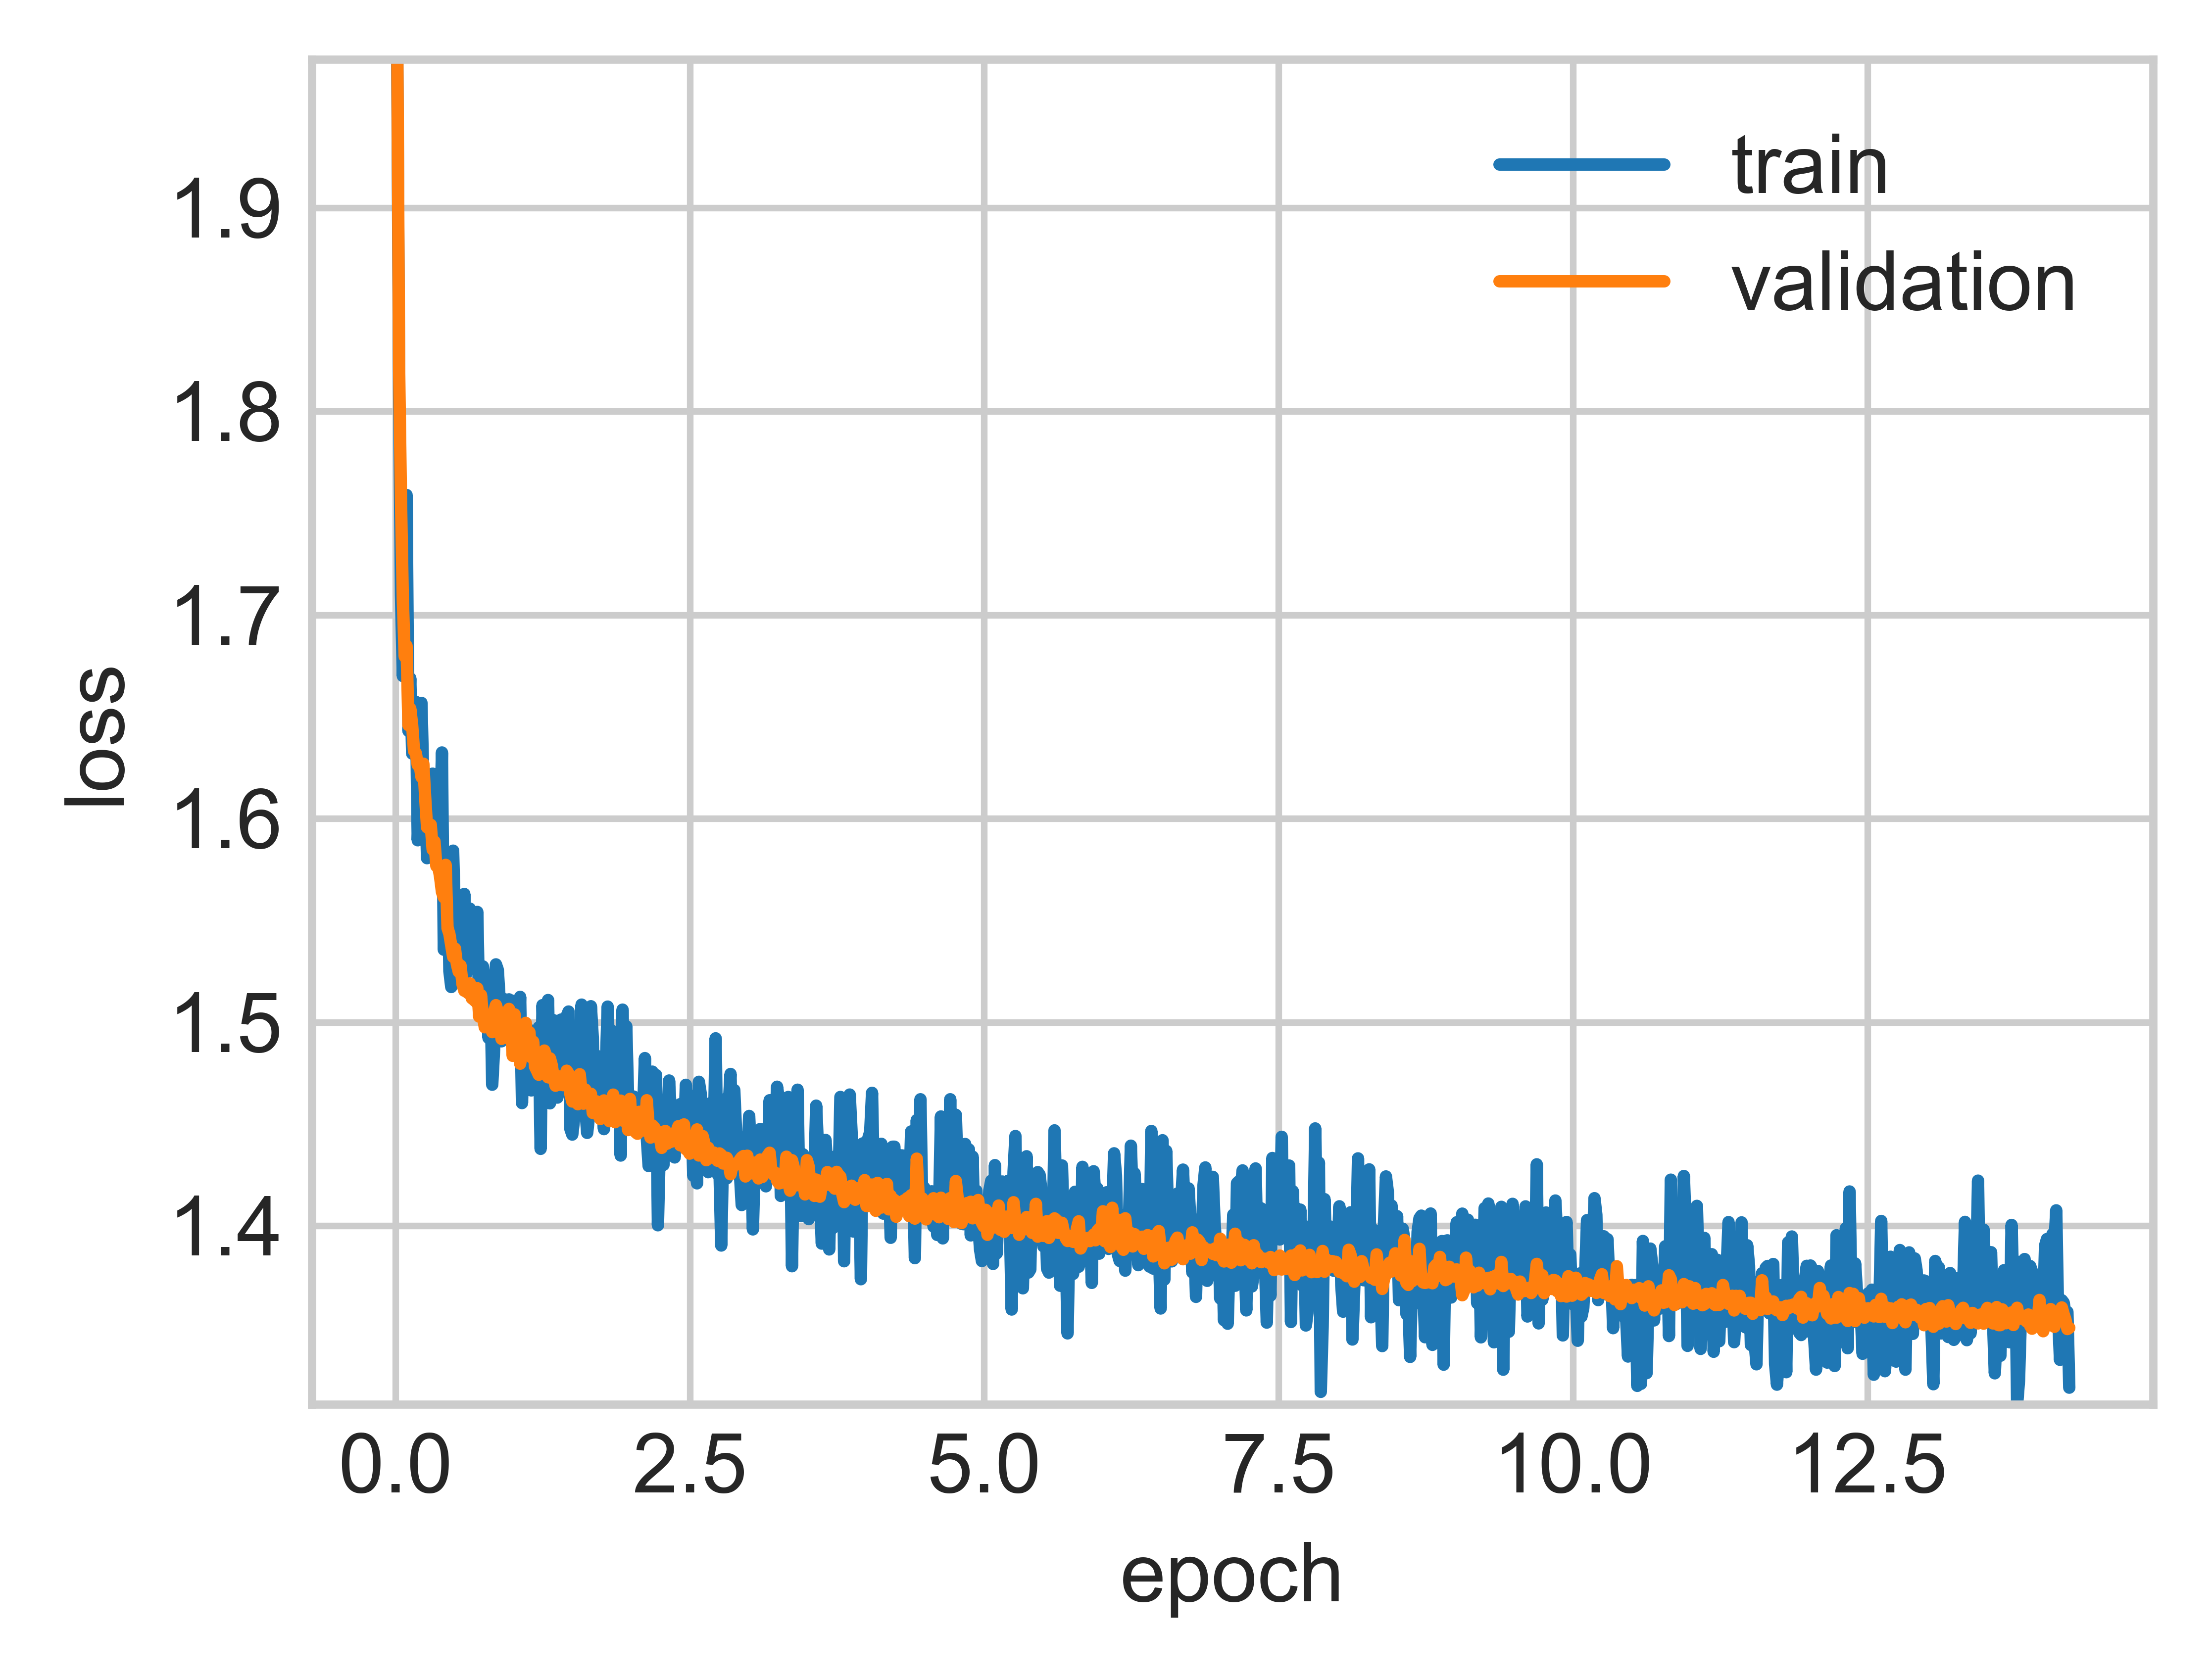

In [26]:
plt.figure(dpi=600,figsize=(4,3))

epoch_arr = batch_size/len(indices_train)*np.arange(len(loss_history["train_loss"]))*100

plt.plot(epoch_arr,loss_history["train_loss"],label="train")
plt.plot(epoch_arr,loss_history["val_loss"],label="validation")
plt.ylim([np.min(loss_history["train_loss"]),loss_history["train_loss"][1]])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig("baseline_.png")

In [ ]:
model.eval()
torch.set_grad_enabled(False)


id_start = 4345
batch_data = getBatchData(state, action, state_next,indices, batch_size=1, batch_id=id_start)
s0, s1, a0 = batch_data["s0"].to(device), batch_data["s1"].to(device), batch_data["a0"].to(device)
s1_pred = model(s0, a0)

n_steps = 100
loss_arr = np.empty(n_steps)

for k in range(n_steps):
    batch_data = getBatchData(state, action, state_next,indices, batch_size=1, batch_id=id_start+k)
    s0, s1, a0 = batch_data["s0"].to(device), batch_data["s1"].to(device), batch_data["a0"].to(device)
    s1_pred = model(s1_pred, a0)
    loss = criterion(s1_pred, s1)
    loss_arr[k] = loss.item()

Text(0, 0.5, 'loss')

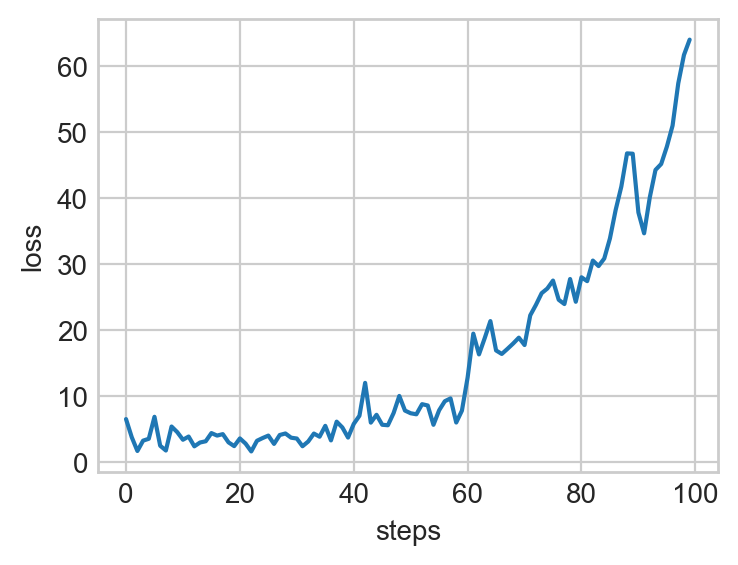

In [276]:
plt.figure(dpi=100,figsize=(4,3))
plt.plot(loss_arr)
plt.xlabel("steps")
plt.ylabel("loss")

In [ ]:
s0, s1, a0 = state[0].to(device), batch_data["s1"].to(device), batch_data["a0"].to(device)

In [209]:
np.state[0]

array([  2.4604056 ,  -1.89323028,   0.40613029,  -1.93339715,
         0.8833979 ,  -8.26327873,  -1.93880644,   7.74912322,
        -0.08398987,  -0.15075459,   0.01678319,   0.1090264 ,
         0.77799359,   0.31201871,   0.54531669,  -0.33914811,
         0.93920827,  -0.05353861,  -3.71295352,   1.28168113,
        -0.97893795,  -2.1528586 , -10.09296843,   6.88349414,
         0.20228271,   0.26967977,  -0.52503022])

In [180]:
model

MyModel(
  (encoder_s): Sequential(
    (0): Linear(in_features=27, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.01, inplace=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): LeakyReLU(negative_slope=0.01, inplace=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): LeakyReLU(negative_slope=0.01, inplace=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): LeakyReLU(negative_slope=0.01, inplace=True)
  )
  (encoder_a): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    

In [196]:

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, activation='relu'):
        super().__init__()
        self.in_channels, self.out_channels, self.activation = in_channels, out_channels, activation
        self.blocks = nn.Identity()
        self.activate = activation_func(activation)
        self.shortcut = nn.Identity()   
    
    def forward(self, x):
        residual = x
        if self.should_apply_shortcut: residual = self.shortcut(x)
        x = self.blocks(x)
        x += residual
        x = self.activate(x)
        return x
    
    @property
    def should_apply_shortcut(self):
        return self.in_channels != self.out_channels

In [199]:
ResidualBlock(32, 64)

ResidualBlock(
  (blocks): Identity()
  (activate): ReLU(inplace=True)
  (shortcut): Identity()
)

In [207]:
dummy = torch.ones((1, 5))

block = ResidualBlock(2, 64)
block(dummy)

tensor([[2., 2., 2., 2., 2.]])

In [208]:
dummy

tensor([[2., 2., 2., 2., 2.]])